# 데이터 전처리
  
## 순서  
   
1. categorical 데이터 숫자화(나이, 시술 회수 컬럼)
2. 결측치 처리(대치 및 보간 등) 
  
### 1. categorical 데이터 숫자화(나이, 시술 횟수 컬럼)  
  
- 나이 컬럼 ordinary data화  
- 횟수 컬럼 숫자화  
- 난자 기증자 나이, 정자 기증자 나이 숫자화  

In [1]:
import pandas as pd

pd.set_option('display.max_columns',None) # 전체 열 출력하기
df = pd.read_csv('data/train.csv')
print(df.shape)
df.head()

(256351, 69)


,ID,시술 시기 코드,시술 당시 나이,임신 시도 또는 마지막 임신 경과 연수,시술 유형,특정 시술 유형,배란 자극 여부,배란 유도 유형,단일 배아 이식 여부,착상 전 유전 검사 사용 여부,착상 전 유전 진단 사용 여부,남성 주 불임 원인,남성 부 불임 원인,여성 주 불임 원인,여성 부 불임 원인,부부 주 불임 원인,부부 부 불임 원인,불명확 불임 원인,불임 원인 - 난관 질환,불임 원인 - 남성 요인,불임 원인 - 배란 장애,불임 원인 - 여성 요인,불임 원인 - 자궁경부 문제,불임 원인 - 자궁내막증,불임 원인 - 정자 농도,불임 원인 - 정자 면역학적 요인,불임 원인 - 정자 운동성,불임 원인 - 정자 형태,배아 생성 주요 이유,총 시술 횟수,클리닉 내 총 시술 횟수,IVF 시술 횟수,DI 시술 횟수,총 임신 횟수,IVF 임신 횟수,DI 임신 횟수,총 출산 횟수,IVF 출산 횟수,DI 출산 횟수,총 생성 배아 수,미세주입된 난자 수,미세주입에서 생성된 배아 수,이식된 배아 수,미세주입 배아 이식 수,저장된 배아 수,미세주입 후 저장된 배아 수,해동된 배아 수,해동 난자 수,수집된 신선 난자 수,저장된 신선 난자 수,혼합된 난자 수,파트너 정자와 혼합된 난자 수,기증자 정자와 혼합된 난자 수,난자 출처,정자 출처,난자 기증자 나이,정자 기증자 나이,동결 배아 사용 여부,신선 배아 사용 여부,기증 배아 사용 여부,대리모 여부,PGD 시술 여부,PGS 시술 여부,난자 채취 경과일,난자 해동 경과일,난자 혼합 경과일,배아 이식 경과일,배아 해동 경과일,임신 성공 여부
0,TRAIN_000000,TRZKPL,만18-34세,NaN,IVF,ICSI,1,기록되지 않은 시행,0.0,NaN,0.0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,현재 시술용,0회,0회,0회,0회,0회,0회,0회,0회,0회,0회,4.0,5.0,4.0,2.0,2.0,2.0,2.0,0.0,0.0,7.0,0.0,5.0,5.0,0.0,본인 제공,배우자 제공,알 수 없음,알 수 없음,0.0,1.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,3.0,NaN,0
1,TRAIN_000001,TRYBLT,만45-50세,NaN,IVF,ICSI,0,알 수 없음,0.0,NaN,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,현재 시술용,0회,0회,0회,0회,0회,0회,0회,0회,0회,0회,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,본인 제공,배우자 제공,알 수 없음,알 수 없음,0.0,1.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0
2,TRAIN_000002,TRVNRY,만18-34세,NaN,IVF,IVF,1,기록되지 않은 시행,0.0,NaN,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,현재 시술용,1회,0회,1회,0회,0회,0회,0회,0회,0회,0회,5.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,7.0,7.0,0.0,본인 제공,배우자 제공,알 수 없음,알 수 없음,0.0,1.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,2.0,NaN,0
3,TRAIN_000003,TRJXFG,만35-37세,NaN,IVF,ICSI,1,기록되지 않은 시행,0.0,NaN,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,현재 시술용,1회,1회,1회,0회,0회,0회,0회,0회,0회,0회,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,4.0,4.0,0.0,본인 제공,배우자 제공,알 수 없음,알 수 없음,0.0,1.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0
4,TRAIN_000004,TRVNRY,만18-34세,NaN,IVF,ICSI,1,기록되지 않은 시행,0.0,NaN,0.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,현재 시술용,0회,0회,0회,0회,0회,0회,0회,0회,0회,0회,6.0,6.0,6.0,2.0,2.0,0.0,0.0,0.0,0.0,7.0,0.0,6.0,6.0,0.0,본인 제공,배우자 제공,알 수 없음,알 수 없음,0.0,1.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,3.0,NaN,0


In [2]:
import re

def tonum(df):
    rows = df.values.tolist()
    cols = df.columns.tolist()
    ageCol = cols.index('시술 당시 나이')
    countColStart =cols.index('총 시술 횟수')
    countColEnd =cols.index('DI 출산 횟수')
    
    for i in range(len(rows)):
        #시술 당시 나이 데이터 숫자화
        age = re.findall(r'\d+',rows[i][ageCol])
        if age:
            if age[0] == '18':
                rows[i][ageCol] = 1
            elif age[0] == '35':
                rows[i][ageCol] = 2
            elif age[0] == '38':
                rows[i][ageCol] = 3
            elif age[0] == '40':
                rows[i][ageCol] = 4
            elif age[0] == '43':
                rows[i][ageCol] = 5
            elif age[0] == '45':
                rows[i][ageCol] = 6
        else:
            rows[i][ageCol] = 6
        
        #시술 횟수 데이터 숫자화
        for j in range(countColStart, countColEnd+1):
            rows[i][j] = int(rows[i][j][0])
            
    res = pd.DataFrame(columns = cols, data = rows)
    
    return res

In [3]:
df1 = tonum(df)

### '~ 기증자 나이' 컬럼 분석
  
나이가 적힌 데이터보다 '알 수 없음' 데이터가 훨씬 많음  
'알 수 없음'은 시술 당사자의 난자나 정자를 사용한 경우로 사료됨  
  
- <b>시술 당시 난자와 정자의 나이는 임신 성공확률과 밀접한 관련이 있음.</b>  

In [10]:
df[(df['정자 출처']=='본인 제공')&(df['정자 기증자 나이']!='알 수 없음')].shape

(0, 69)

In [12]:
df[(df['난자 출처']=='본인 제공')&(df['난자 기증자 나이']!='알 수 없음')].shape

(0, 69)

C:\Users\psjoy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50508 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\psjoy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\psjoy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50630 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\psjoy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\psjoy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47564 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\psjoy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49464 missing from c

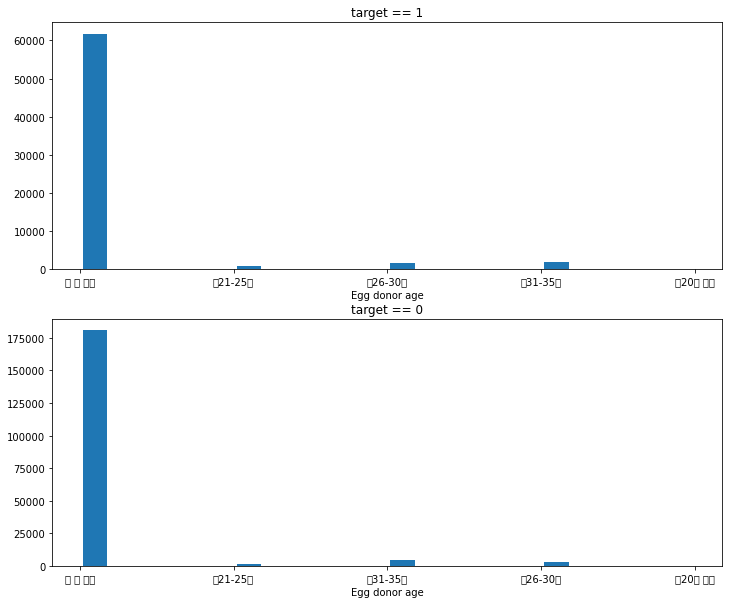

In [24]:
import matplotlib.pyplot as plt


df1 = df[df['임신 성공 여부']==1]
df2 = df[df['임신 성공 여부']==0]

plt.figure(figsize=(12,10))

plt.subplot(2,1,1)
plt.hist(data=df1, x='난자 기증자 나이', rwidth=0.8, bins=20)
plt.title('target == 1')
plt.xlabel('Egg donor age')

plt.subplot(2,1,2)
plt.hist(data=df2, x='난자 기증자 나이', rwidth=0.8, bins=20)
plt.title('target == 0')
plt.xlabel('Egg donor age')

counts, bins, _ = plt.hist(df['Name'])

plt.show()

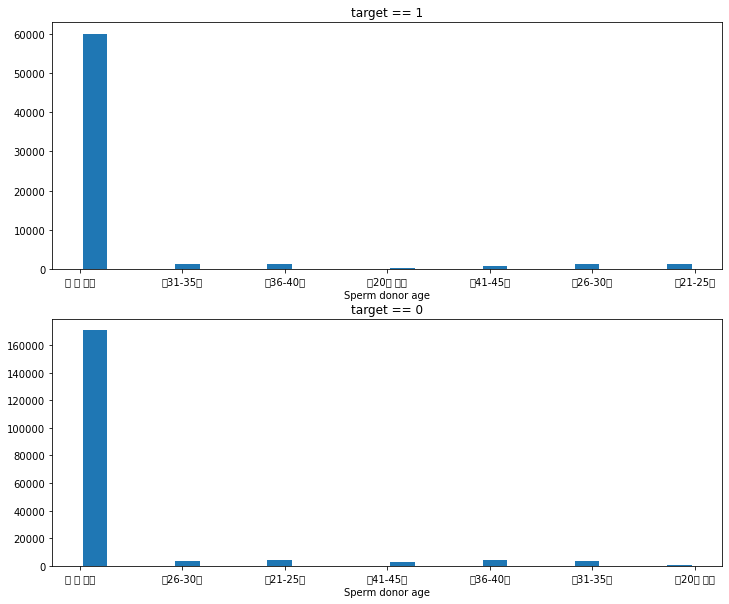

In [23]:
plt.figure(figsize=(12,10))

plt.subplot(2,1,1)
plt.hist(data=df1, x='정자 기증자 나이', rwidth=0.8, bins=20)
plt.title('target == 1')
plt.xlabel('Sperm donor age')

plt.subplot(2,1,2)
plt.hist(data=df2, x='정자 기증자 나이', rwidth=0.8, bins=20)
plt.title('target == 0')
plt.xlabel('Sperm donor age')

plt.show()

### '~ 기증자 나이' 컬럼 처리

데이터 처리 방향 1 : '난자 나이', '정자 나이' 컬럼을 추가.
- '시술 당시 나이' 컬럼을 기준으로 나이를 나눈다. 각 카테고리는 1부터 6까지 숫자로 표현된다.  
  
['만18-34세', '만35-37세', '만38-39세', '만40-42세', '만43-44세', '만45-50세', '알 수 없음']

- '기증자 나이'가 주어진 경우, 기증자 나이의 중앙값을 기준으로 난자 나이, 정자 나이 기록.
- '기증자 나이'가 주어지지 않은 경우 '시술 당시 나이'를 기반으로 기록.
    
['만20세 이하', '만21-25세'(중앙값 23), '만26-30세'(28), '만31-35세'(33), '만36-40세'(38), '만41-45세'(43), '알 수 없음'] 
  
기증자 나이에 따른 숫자 분류는 아래와 같다.    
- 기증자 나이 1 > 난자/정자 나이 1  
- 기증자 나이 2 > 난자/정자 나이 1  
- 기증자 나이 3 > 난자/정자 나이 1  
- 기증자 나이 4 > 난자/정자 나이 1  
- 기증자 나이 5 > 난자/정자 나이 3  
- 기증자 나이 6 > 난자/정자 나이 5  
  
'시술 당시 나이'는 임신 여부를 확인할 수 있는 사람, 즉 여성측을 기준으로 작성되었으므로 정자의 나이의 경우 평균적인 기혼 연령차를 기반으로 나이를 더해 인코딩한다. 해당 데이터는 영국의 HFEA에서 만들어진 데이터이며, 영국의 경우 평균적으로 기혼자 간의 연령차는 남자가 여자보다 2~3 세 많은 것으로 보고되었다. 따라서 정자 나이는 아래와 같이 구한다.    
  
- '기증자 나이'가 주어지지 않은 경우 '시술 당시 나이'를 기반으로 기록하되, 중앙값 + 3으로 나이를 산정해 분류한다.  
  
['만18-34세'(중앙값 26), '만35-37세'(36), '만38-39세'(39), '만40-42세'(41), '만43-44세'(44), '만45-50세'(48), '알 수 없음']  
  
각 중앙값에 3을 더하면 아래와 같다.  
[29, 39, 42, 44, 47, 51]  
위 나이를 기반으로 정자 나이를 분류한다. 따라서 인코딩은 아래처럼 이루어진다.  
- 시술 당시 나이 1 > 정자 나이 1
- 시술 당시 나이 2 > 정자 나이 3
- 시술 당시 나이 3 > 정자 나이 4
- 시술 당시 나이 4 > 정자 나이 5
- 시술 당시 나이 5 > 정자 나이 6
- 시술 당시 나이 6 > 정자 나이 6
  
데이터 처리 방향 2 : '~ 기증자 나이' 컬럼을 기반으로 '기증 난자 / 정자 사용 여부' 컬럼을 추가한다.  
  
- 기증자 나이가 알 수 없음인 경우 0, 그렇지 않은 경우 1.  
  
데이터 처리가 끝난 후 '난자 출처', '정자 출처', '난자 기증자 나이', '정자 기증자 나이' 네 컬럼은 삭제한다.

In [4]:
from copy import deepcopy
def getCellAge(df):
    tmp = deepcopy(df)
    tmp['난자 나이'] = -1
    tmp['정자 나이'] = -1
    tmp['기증 난자 사용 여부'] = 1
    tmp['기증 정자 사용 여부'] = 1
    
    rows = tmp.values.tolist()
    cols = tmp.columns.tolist()
    ageCol = cols.index('시술 당시 나이')
    donorAgeCol1 =cols.index('난자 기증자 나이')
    donorAgeCol2 =cols.index('정자 기증자 나이')
    eggAgeCol =cols.index('난자 나이')
    spermAgeCol =cols.index('정자 나이')
    isDonatedEggCol = cols.index('기증 난자 사용 여부')
    isDonatedSpermCol = cols.index('기증 정자 사용 여부')
    
    
    for i in range(len(rows)):
        age = rows[i][ageCol]
        eggAge = rows[i][donorAgeCol1][1:3]
        spermAge = rows[i][donorAgeCol2][1:3]
        
        #난자 나이 입력
        if eggAge == '20' or eggAge == '21' or eggAge == '26' or eggAge == '31':
            rows[i][eggAgeCol] = 1
        elif eggAge == '36':
            rows[i][eggAgeCol] = 3
        elif eggAge == '41':
            rows[i][eggAgeCol] = 5
        else:
            rows[i][eggAgeCol] = age
            rows[i][isDonatedEggCol] = 0
        
        #정자 나이 입력
        if spermAge == '20' or spermAge == '21' or spermAge == '26' or spermAge == '31':
            rows[i][spermAgeCol] = 1
        elif spermAge == '36':
            rows[i][spermAgeCol] = 3
        elif spermAge == '41':
            rows[i][spermAgeCol] = 5
        else:
            rows[i][isDonatedSpermCol] = 0
            if age == 1 or age == 6:
                rows[i][spermAgeCol] = age
            else:
                rows[i][spermAgeCol] = age + 1
            
    res = pd.DataFrame(columns = cols, data = rows)
    res = res.drop(columns=[ '난자 출처', '정자 출처', '난자 기증자 나이', '정자 기증자 나이' ])
    
    return res

In [5]:
df2 = getCellAge(df1)
df2.head()

,ID,시술 시기 코드,시술 당시 나이,임신 시도 또는 마지막 임신 경과 연수,시술 유형,특정 시술 유형,배란 자극 여부,배란 유도 유형,단일 배아 이식 여부,착상 전 유전 검사 사용 여부,착상 전 유전 진단 사용 여부,남성 주 불임 원인,남성 부 불임 원인,여성 주 불임 원인,여성 부 불임 원인,부부 주 불임 원인,부부 부 불임 원인,불명확 불임 원인,불임 원인 - 난관 질환,불임 원인 - 남성 요인,불임 원인 - 배란 장애,불임 원인 - 여성 요인,불임 원인 - 자궁경부 문제,불임 원인 - 자궁내막증,불임 원인 - 정자 농도,불임 원인 - 정자 면역학적 요인,불임 원인 - 정자 운동성,불임 원인 - 정자 형태,배아 생성 주요 이유,총 시술 횟수,클리닉 내 총 시술 횟수,IVF 시술 횟수,DI 시술 횟수,총 임신 횟수,IVF 임신 횟수,DI 임신 횟수,총 출산 횟수,IVF 출산 횟수,DI 출산 횟수,총 생성 배아 수,미세주입된 난자 수,미세주입에서 생성된 배아 수,이식된 배아 수,미세주입 배아 이식 수,저장된 배아 수,미세주입 후 저장된 배아 수,해동된 배아 수,해동 난자 수,수집된 신선 난자 수,저장된 신선 난자 수,혼합된 난자 수,파트너 정자와 혼합된 난자 수,기증자 정자와 혼합된 난자 수,동결 배아 사용 여부,신선 배아 사용 여부,기증 배아 사용 여부,대리모 여부,PGD 시술 여부,PGS 시술 여부,난자 채취 경과일,난자 해동 경과일,난자 혼합 경과일,배아 이식 경과일,배아 해동 경과일,임신 성공 여부,난자 나이,정자 나이,기증 난자 사용 여부,기증 정자 사용 여부
0,TRAIN_000000,TRZKPL,1,NaN,IVF,ICSI,1,기록되지 않은 시행,0.0,NaN,0.0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,현재 시술용,0,0,0,0,0,0,0,0,0,0,4.0,5.0,4.0,2.0,2.0,2.0,2.0,0.0,0.0,7.0,0.0,5.0,5.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,3.0,NaN,0,1,1,0,0
1,TRAIN_000001,TRYBLT,6,NaN,IVF,ICSI,0,알 수 없음,0.0,NaN,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,현재 시술용,0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0,6,6,0,0
2,TRAIN_000002,TRVNRY,1,NaN,IVF,IVF,1,기록되지 않은 시행,0.0,NaN,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,현재 시술용,1,0,1,0,0,0,0,0,0,0,5.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,7.0,7.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,2.0,NaN,0,1,1,0,0
3,TRAIN_000003,TRJXFG,2,NaN,IVF,ICSI,1,기록되지 않은 시행,0.0,NaN,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,현재 시술용,1,1,1,0,0,0,0,0,0,0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,4.0,4.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0,2,3,0,0
4,TRAIN_000004,TRVNRY,1,NaN,IVF,ICSI,1,기록되지 않은 시행,0.0,NaN,0.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,현재 시술용,0,0,0,0,0,0,0,0,0,0,6.0,6.0,6.0,2.0,2.0,0.0,0.0,0.0,0.0,7.0,0.0,6.0,6.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,3.0,NaN,0,1,1,0,0


### 2. 결측치 처리  
  
- '임신 시도 또는 마지막 임신 경과 연수' 컬럼: KNN 보간법 vs 삭제 > 삭제
- 시술 유형 별로 데이터 분리 후, DI 시술에서 사용하지 않는 컬럼 삭제
- PGD, PGS 검사 결측치: 모두 0으로 대치  
- '~ 경과일' 컬럼: 해당 컬럼을 제거하고 '~ 시술 여부' 컬럼 추가. '~ 경과일' 컬럼이 NaN인 경우 0, 그렇지 않은 경우 1로 기록  

  

In [6]:
#KNN 보간법
#상관관계 확인
tmp = df2[df2['임신 시도 또는 마지막 임신 경과 연수'] == df2['임신 시도 또는 마지막 임신 경과 연수']]
crr = tmp.corr(method='pearson')['임신 시도 또는 마지막 임신 경과 연수']
pd.set_option('display.max_rows', None)
print(crr)

시술 당시 나이                 0.153239
임신 시도 또는 마지막 임신 경과 연수    1.000000
배란 자극 여부                -0.030432
단일 배아 이식 여부             -0.010636
착상 전 유전 검사 사용 여부              NaN
착상 전 유전 진단 사용 여부        -0.005413
남성 주 불임 원인               0.072451
남성 부 불임 원인              -0.039629
여성 주 불임 원인              -0.067372
여성 부 불임 원인               0.083638
부부 주 불임 원인               0.079658
부부 부 불임 원인              -0.048786
불명확 불임 원인               -0.026997
불임 원인 - 난관 질환            0.059800
불임 원인 - 남성 요인            0.023195
불임 원인 - 배란 장애            0.029033
불임 원인 - 여성 요인                 NaN
불임 원인 - 자궁경부 문제          0.013160
불임 원인 - 자궁내막증            0.001810
불임 원인 - 정자 농도           -0.042801
불임 원인 - 정자 면역학적 요인            NaN
불임 원인 - 정자 운동성          -0.068822
불임 원인 - 정자 형태           -0.050921
총 시술 횟수                  0.125772
클리닉 내 총 시술 횟수            0.118753
IVF 시술 횟수                0.126640
DI 시술 횟수                 0.012183
총 임신 횟수                  0.020412
IVF 임신 횟수                0.018526
DI 임신 횟수      

### KNN 보간법  
  
'임신 시도 또는 마지막 임신 경과 연수' 컬럼은 전체적으로 다른 컬럼과 상관계수가 낮다.  
상관계수가 상대적으로 높은 컬럼도 최대 0.15이다.  
또한 결측치가 20만개가 넘으므로 KNN보간법 사용시 컴퓨팅 시간이 매우 오래 소요된다.  
컴퓨팅 타임에 비해 얻을 수 있는 정보량이 적으므로 '임신 시도 또는 마지막 임신 경과 연수' 컬럼은 삭제한다.

In [7]:
df2 = df2.drop(columns = ['임신 시도 또는 마지막 임신 경과 연수'])
df2.head()

,ID,시술 시기 코드,시술 당시 나이,시술 유형,특정 시술 유형,배란 자극 여부,배란 유도 유형,단일 배아 이식 여부,착상 전 유전 검사 사용 여부,착상 전 유전 진단 사용 여부,남성 주 불임 원인,남성 부 불임 원인,여성 주 불임 원인,여성 부 불임 원인,부부 주 불임 원인,부부 부 불임 원인,불명확 불임 원인,불임 원인 - 난관 질환,불임 원인 - 남성 요인,불임 원인 - 배란 장애,불임 원인 - 여성 요인,불임 원인 - 자궁경부 문제,불임 원인 - 자궁내막증,불임 원인 - 정자 농도,불임 원인 - 정자 면역학적 요인,불임 원인 - 정자 운동성,불임 원인 - 정자 형태,배아 생성 주요 이유,총 시술 횟수,클리닉 내 총 시술 횟수,IVF 시술 횟수,DI 시술 횟수,총 임신 횟수,IVF 임신 횟수,DI 임신 횟수,총 출산 횟수,IVF 출산 횟수,DI 출산 횟수,총 생성 배아 수,미세주입된 난자 수,미세주입에서 생성된 배아 수,이식된 배아 수,미세주입 배아 이식 수,저장된 배아 수,미세주입 후 저장된 배아 수,해동된 배아 수,해동 난자 수,수집된 신선 난자 수,저장된 신선 난자 수,혼합된 난자 수,파트너 정자와 혼합된 난자 수,기증자 정자와 혼합된 난자 수,동결 배아 사용 여부,신선 배아 사용 여부,기증 배아 사용 여부,대리모 여부,PGD 시술 여부,PGS 시술 여부,난자 채취 경과일,난자 해동 경과일,난자 혼합 경과일,배아 이식 경과일,배아 해동 경과일,임신 성공 여부,난자 나이,정자 나이,기증 난자 사용 여부,기증 정자 사용 여부
0,TRAIN_000000,TRZKPL,1,IVF,ICSI,1,기록되지 않은 시행,0.0,NaN,0.0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,현재 시술용,0,0,0,0,0,0,0,0,0,0,4.0,5.0,4.0,2.0,2.0,2.0,2.0,0.0,0.0,7.0,0.0,5.0,5.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,3.0,NaN,0,1,1,0,0
1,TRAIN_000001,TRYBLT,6,IVF,ICSI,0,알 수 없음,0.0,NaN,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,현재 시술용,0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0,6,6,0,0
2,TRAIN_000002,TRVNRY,1,IVF,IVF,1,기록되지 않은 시행,0.0,NaN,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,현재 시술용,1,0,1,0,0,0,0,0,0,0,5.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,7.0,7.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,2.0,NaN,0,1,1,0,0
3,TRAIN_000003,TRJXFG,2,IVF,ICSI,1,기록되지 않은 시행,0.0,NaN,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,현재 시술용,1,1,1,0,0,0,0,0,0,0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,4.0,4.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0,2,3,0,0
4,TRAIN_000004,TRVNRY,1,IVF,ICSI,1,기록되지 않은 시행,0.0,NaN,0.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,현재 시술용,0,0,0,0,0,0,0,0,0,0,6.0,6.0,6.0,2.0,2.0,0.0,0.0,0.0,0.0,7.0,0.0,6.0,6.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,3.0,NaN,0,1,1,0,0


In [8]:
#시술 유형 별로 데이터 분리
dfdi = df2[df2['시술 유형']=='DI']
dfivf = df2[df2['시술 유형']=='IVF']

#DI 시술에서 사용하지 않는 컬럼 삭제
#배란 유도 유형은 모두 '알 수 없음'이기 때문에 null이라 여기고 삭제
droplist = ['배란 유도 유형','단일 배아 이식 여부','착상 전 유전 검사 사용 여부','착상 전 유전 진단 사용 여부',
           '배아 생성 주요 이유','총 생성 배아 수','미세주입된 난자 수','미세주입에서 생성된 배아 수',
           '이식된 배아 수','미세주입 배아 이식 수','저장된 배아 수',
           '미세주입 후 저장된 배아 수','해동된 배아 수','해동 난자 수',
           '수집된 신선 난자 수','저장된 신선 난자 수','혼합된 난자 수',
           '파트너 정자와 혼합된 난자 수','기증자 정자와 혼합된 난자 수',
           '동결 배아 사용 여부','신선 배아 사용 여부','기증 배아 사용 여부','대리모 여부',
           'PGD 시술 여부','PGS 시술 여부','난자 채취 경과일','난자 해동 경과일',
           '난자 혼합 경과일','배아 이식 경과일','배아 해동 경과일']
dfdi = dfdi.drop(columns=droplist)
print(dfdi.shape)
dfdi.head()

(6291, 38)


,ID,시술 시기 코드,시술 당시 나이,시술 유형,특정 시술 유형,배란 자극 여부,남성 주 불임 원인,남성 부 불임 원인,여성 주 불임 원인,여성 부 불임 원인,부부 주 불임 원인,부부 부 불임 원인,불명확 불임 원인,불임 원인 - 난관 질환,불임 원인 - 남성 요인,불임 원인 - 배란 장애,불임 원인 - 여성 요인,불임 원인 - 자궁경부 문제,불임 원인 - 자궁내막증,불임 원인 - 정자 농도,불임 원인 - 정자 면역학적 요인,불임 원인 - 정자 운동성,불임 원인 - 정자 형태,총 시술 횟수,클리닉 내 총 시술 횟수,IVF 시술 횟수,DI 시술 횟수,총 임신 횟수,IVF 임신 횟수,DI 임신 횟수,총 출산 횟수,IVF 출산 횟수,DI 출산 횟수,임신 성공 여부,난자 나이,정자 나이,기증 난자 사용 여부,기증 정자 사용 여부
14,TRAIN_000014,TRXQMD,3,DI,IUI,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,3,5,5,0,0,0,0,0,0,0,3,1,0,1
39,TRAIN_000039,TRDQAZ,1,DI,IUI,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3,3,0,3,1,0,1,1,0,1,0,1,3,0,1
127,TRAIN_000127,TRJXFG,2,DI,IUI,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,3,3,0,3,0,0,0,0,0,0,0,2,5,0,1
162,TRAIN_000162,TRXQMD,3,DI,IUI,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,3,3,0,3,0,0,0,0,0,0,0,3,5,0,1
174,TRAIN_000174,TRCMWS,4,DI,IUI,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,4,1,0,1


In [9]:
dfdi[dfdi['특정 시술 유형']=='IUI'].shape


(6100, 38)

In [10]:
#PGD, PGS 검사 관련 결측치 0으로 대치
cols = ['착상 전 유전 검사 사용 여부', '착상 전 유전 진단 사용 여부',
       'PGD 시술 여부','PGS 시술 여부']
for col in cols:
    #dfivf.loc[dfivf[col] != dfivf[col], col] = 0
    dfivf[col] = dfivf[col].fillna(0)
    
print(dfivf.shape)
dfivf.head()

(250060, 68)


<ipython-input-10-a7b7f7c7633b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfivf[col] = dfivf[col].fillna(0)


,ID,시술 시기 코드,시술 당시 나이,시술 유형,특정 시술 유형,배란 자극 여부,배란 유도 유형,단일 배아 이식 여부,착상 전 유전 검사 사용 여부,착상 전 유전 진단 사용 여부,남성 주 불임 원인,남성 부 불임 원인,여성 주 불임 원인,여성 부 불임 원인,부부 주 불임 원인,부부 부 불임 원인,불명확 불임 원인,불임 원인 - 난관 질환,불임 원인 - 남성 요인,불임 원인 - 배란 장애,불임 원인 - 여성 요인,불임 원인 - 자궁경부 문제,불임 원인 - 자궁내막증,불임 원인 - 정자 농도,불임 원인 - 정자 면역학적 요인,불임 원인 - 정자 운동성,불임 원인 - 정자 형태,배아 생성 주요 이유,총 시술 횟수,클리닉 내 총 시술 횟수,IVF 시술 횟수,DI 시술 횟수,총 임신 횟수,IVF 임신 횟수,DI 임신 횟수,총 출산 횟수,IVF 출산 횟수,DI 출산 횟수,총 생성 배아 수,미세주입된 난자 수,미세주입에서 생성된 배아 수,이식된 배아 수,미세주입 배아 이식 수,저장된 배아 수,미세주입 후 저장된 배아 수,해동된 배아 수,해동 난자 수,수집된 신선 난자 수,저장된 신선 난자 수,혼합된 난자 수,파트너 정자와 혼합된 난자 수,기증자 정자와 혼합된 난자 수,동결 배아 사용 여부,신선 배아 사용 여부,기증 배아 사용 여부,대리모 여부,PGD 시술 여부,PGS 시술 여부,난자 채취 경과일,난자 해동 경과일,난자 혼합 경과일,배아 이식 경과일,배아 해동 경과일,임신 성공 여부,난자 나이,정자 나이,기증 난자 사용 여부,기증 정자 사용 여부
0,TRAIN_000000,TRZKPL,1,IVF,ICSI,1,기록되지 않은 시행,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,현재 시술용,0,0,0,0,0,0,0,0,0,0,4.0,5.0,4.0,2.0,2.0,2.0,2.0,0.0,0.0,7.0,0.0,5.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,3.0,NaN,0,1,1,0,0
1,TRAIN_000001,TRYBLT,6,IVF,ICSI,0,알 수 없음,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,현재 시술용,0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0,6,6,0,0
2,TRAIN_000002,TRVNRY,1,IVF,IVF,1,기록되지 않은 시행,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,현재 시술용,1,0,1,0,0,0,0,0,0,0,5.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,7.0,7.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,2.0,NaN,0,1,1,0,0
3,TRAIN_000003,TRJXFG,2,IVF,ICSI,1,기록되지 않은 시행,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,현재 시술용,1,1,1,0,0,0,0,0,0,0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,4.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0,2,3,0,0
4,TRAIN_000004,TRVNRY,1,IVF,ICSI,1,기록되지 않은 시행,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,현재 시술용,0,0,0,0,0,0,0,0,0,0,6.0,6.0,6.0,2.0,2.0,0.0,0.0,0.0,0.0,7.0,0.0,6.0,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,3.0,NaN,0,1,1,0,0


In [21]:
import numpy as np
#'~ 경과일' 컬럼: 해당 컬럼을 제거하고 '~ 여부' 컬럼 추가. 
#'~ 경과일' 컬럼이 NaN인 경우 0, 그렇지 않은 경우 1로 기록
def dateToProgress(df):
    tmp = deepcopy(df)
    tmp['난자 채취 여부'] = 0
    tmp['난자 해동 여부'] = 0
    tmp['난자 혼합 여부'] = 0
    tmp['배아 이식 여부'] = 0
    tmp['배아 해동 여부'] = 0
    
    rows = tmp.values.tolist()
    cols = tmp.columns.tolist()
    startCol = cols.index('난자 채취 경과일')
    endCol = cols.index('배아 해동 경과일')
    
    newStartCol = cols.index('난자 채취 여부')
    newEndCol = cols.index('배아 해동 여부')
    
    for i in range(len(rows)):
        for j in range(5):
            if not np.isnan(rows[i][startCol+j]):
                rows[i][newStartCol+j] = 1
    
    res = pd.DataFrame(columns = cols, data = rows)
    res = res.drop(columns=[ '난자 채취 경과일','난자 해동 경과일',
           '난자 혼합 경과일','배아 이식 경과일','배아 해동 경과일'])
    return res

In [17]:

#dfivf[dfivf['배아 해동 경과일']].shape()
dfivf.head()

,ID,시술 시기 코드,시술 당시 나이,시술 유형,특정 시술 유형,배란 자극 여부,배란 유도 유형,단일 배아 이식 여부,착상 전 유전 검사 사용 여부,착상 전 유전 진단 사용 여부,남성 주 불임 원인,남성 부 불임 원인,여성 주 불임 원인,여성 부 불임 원인,부부 주 불임 원인,부부 부 불임 원인,불명확 불임 원인,불임 원인 - 난관 질환,불임 원인 - 남성 요인,불임 원인 - 배란 장애,불임 원인 - 여성 요인,불임 원인 - 자궁경부 문제,불임 원인 - 자궁내막증,불임 원인 - 정자 농도,불임 원인 - 정자 면역학적 요인,불임 원인 - 정자 운동성,불임 원인 - 정자 형태,배아 생성 주요 이유,총 시술 횟수,클리닉 내 총 시술 횟수,IVF 시술 횟수,DI 시술 횟수,총 임신 횟수,IVF 임신 횟수,DI 임신 횟수,총 출산 횟수,IVF 출산 횟수,DI 출산 횟수,총 생성 배아 수,미세주입된 난자 수,미세주입에서 생성된 배아 수,이식된 배아 수,미세주입 배아 이식 수,저장된 배아 수,미세주입 후 저장된 배아 수,해동된 배아 수,해동 난자 수,수집된 신선 난자 수,저장된 신선 난자 수,혼합된 난자 수,파트너 정자와 혼합된 난자 수,기증자 정자와 혼합된 난자 수,동결 배아 사용 여부,신선 배아 사용 여부,기증 배아 사용 여부,대리모 여부,PGD 시술 여부,PGS 시술 여부,난자 채취 경과일,난자 해동 경과일,난자 혼합 경과일,배아 이식 경과일,배아 해동 경과일,임신 성공 여부,난자 나이,정자 나이,기증 난자 사용 여부,기증 정자 사용 여부
0,TRAIN_000000,TRZKPL,1,IVF,ICSI,1,기록되지 않은 시행,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,현재 시술용,0,0,0,0,0,0,0,0,0,0,4.0,5.0,4.0,2.0,2.0,2.0,2.0,0.0,0.0,7.0,0.0,5.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,3.0,NaN,0,1,1,0,0
1,TRAIN_000001,TRYBLT,6,IVF,ICSI,0,알 수 없음,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,현재 시술용,0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0,6,6,0,0
2,TRAIN_000002,TRVNRY,1,IVF,IVF,1,기록되지 않은 시행,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,현재 시술용,1,0,1,0,0,0,0,0,0,0,5.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,7.0,7.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,2.0,NaN,0,1,1,0,0
3,TRAIN_000003,TRJXFG,2,IVF,ICSI,1,기록되지 않은 시행,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,현재 시술용,1,1,1,0,0,0,0,0,0,0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,4.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0,2,3,0,0
4,TRAIN_000004,TRVNRY,1,IVF,ICSI,1,기록되지 않은 시행,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,현재 시술용,0,0,0,0,0,0,0,0,0,0,6.0,6.0,6.0,2.0,2.0,0.0,0.0,0.0,0.0,7.0,0.0,6.0,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,3.0,NaN,0,1,1,0,0


In [22]:
dfivf2 = dateToProgress(dfivf)
print(dfivf2.shape) 
dfivf2.head()

(250060, 68)


,ID,시술 시기 코드,시술 당시 나이,시술 유형,특정 시술 유형,배란 자극 여부,배란 유도 유형,단일 배아 이식 여부,착상 전 유전 검사 사용 여부,착상 전 유전 진단 사용 여부,남성 주 불임 원인,남성 부 불임 원인,여성 주 불임 원인,여성 부 불임 원인,부부 주 불임 원인,부부 부 불임 원인,불명확 불임 원인,불임 원인 - 난관 질환,불임 원인 - 남성 요인,불임 원인 - 배란 장애,불임 원인 - 여성 요인,불임 원인 - 자궁경부 문제,불임 원인 - 자궁내막증,불임 원인 - 정자 농도,불임 원인 - 정자 면역학적 요인,불임 원인 - 정자 운동성,불임 원인 - 정자 형태,배아 생성 주요 이유,총 시술 횟수,클리닉 내 총 시술 횟수,IVF 시술 횟수,DI 시술 횟수,총 임신 횟수,IVF 임신 횟수,DI 임신 횟수,총 출산 횟수,IVF 출산 횟수,DI 출산 횟수,총 생성 배아 수,미세주입된 난자 수,미세주입에서 생성된 배아 수,이식된 배아 수,미세주입 배아 이식 수,저장된 배아 수,미세주입 후 저장된 배아 수,해동된 배아 수,해동 난자 수,수집된 신선 난자 수,저장된 신선 난자 수,혼합된 난자 수,파트너 정자와 혼합된 난자 수,기증자 정자와 혼합된 난자 수,동결 배아 사용 여부,신선 배아 사용 여부,기증 배아 사용 여부,대리모 여부,PGD 시술 여부,PGS 시술 여부,임신 성공 여부,난자 나이,정자 나이,기증 난자 사용 여부,기증 정자 사용 여부,난자 채취 여부,난자 해동 여부,난자 혼합 여부,배아 이식 여부,배아 해동 여부
0,TRAIN_000000,TRZKPL,1,IVF,ICSI,1,기록되지 않은 시행,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,현재 시술용,0,0,0,0,0,0,0,0,0,0,4.0,5.0,4.0,2.0,2.0,2.0,2.0,0.0,0.0,7.0,0.0,5.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1,1,0,0,1,0,1,1,0
1,TRAIN_000001,TRYBLT,6,IVF,ICSI,0,알 수 없음,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,현재 시술용,0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,6,6,0,0,1,0,1,0,0
2,TRAIN_000002,TRVNRY,1,IVF,IVF,1,기록되지 않은 시행,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,현재 시술용,1,0,1,0,0,0,0,0,0,0,5.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,7.0,7.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1,1,0,0,1,0,1,1,0
3,TRAIN_000003,TRJXFG,2,IVF,ICSI,1,기록되지 않은 시행,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,현재 시술용,1,1,1,0,0,0,0,0,0,0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,4.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,2,3,0,0,1,0,1,0,0
4,TRAIN_000004,TRVNRY,1,IVF,ICSI,1,기록되지 않은 시행,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,현재 시술용,0,0,0,0,0,0,0,0,0,0,6.0,6.0,6.0,2.0,2.0,0.0,0.0,0.0,0.0,7.0,0.0,6.0,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1,1,0,0,1,0,1,1,0


In [49]:
dfivf2.to_csv('data/train_ivf.csv', index=False)
dfdi.to_csv('data/train_di.csv', index=False)